In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Step 2: Calculate Pivot Points
def calculate_pivot_points(data):
    high = data['High']
    low = data['Low']
    close = data['Close']
    
    # Calculate pivot levels as single Series
    pivot = (high + low + close) / 3
    r1 = 2 * pivot - low
    s1 = 2 * pivot - high
    r2 = pivot + (high - low)
    s2 = pivot - (high - low)
    r3 = r2 + (high - low)
    s3 = s2 - (high - low)
    
    # Assign pivot levels to the DataFrame
    data['Pivot'] = pivot
    data['R1'] = r1
    data['S1'] = s1
    data['R2'] = r2
    data['S2'] = s2
    data['R3'] = r3
    data['S3'] = s3
    
    return data

In [9]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the pivot point calculation
    data = calculate_pivot_points(data)
    
    # Step 3: Plot Close Price and Pivot Points
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.6)
    
    # Plot pivot points
    plt.axhline(data['Pivot'].iloc[-1], linestyle='--', color='black', label='Pivot (PP)')
    plt.axhline(data['R1'].iloc[-1], linestyle='--', color='green', label='Resistance R1')
    plt.axhline(data['S1'].iloc[-1], linestyle='--', color='red', label='Support S1')
    plt.axhline(data['R2'].iloc[-1], linestyle='--', color='darkgreen', label='Resistance R2')
    plt.axhline(data['S2'].iloc[-1], linestyle='--', color='darkred', label='Support S2')
    plt.axhline(data['R3'].iloc[-1], linestyle='--', color='lightgreen', label='Resistance R3')
    plt.axhline(data['S3'].iloc[-1], linestyle='--', color='pink', label='Support S3')
    
    plt.title(f'Pivot Points for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


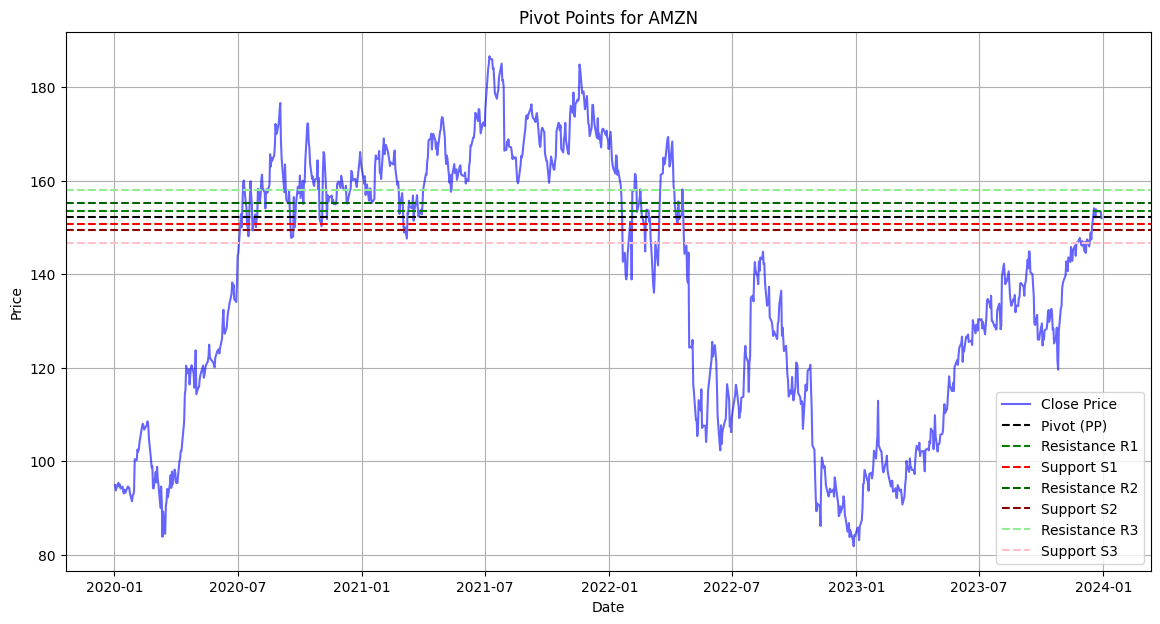

In [10]:
show_graph("AMZN")